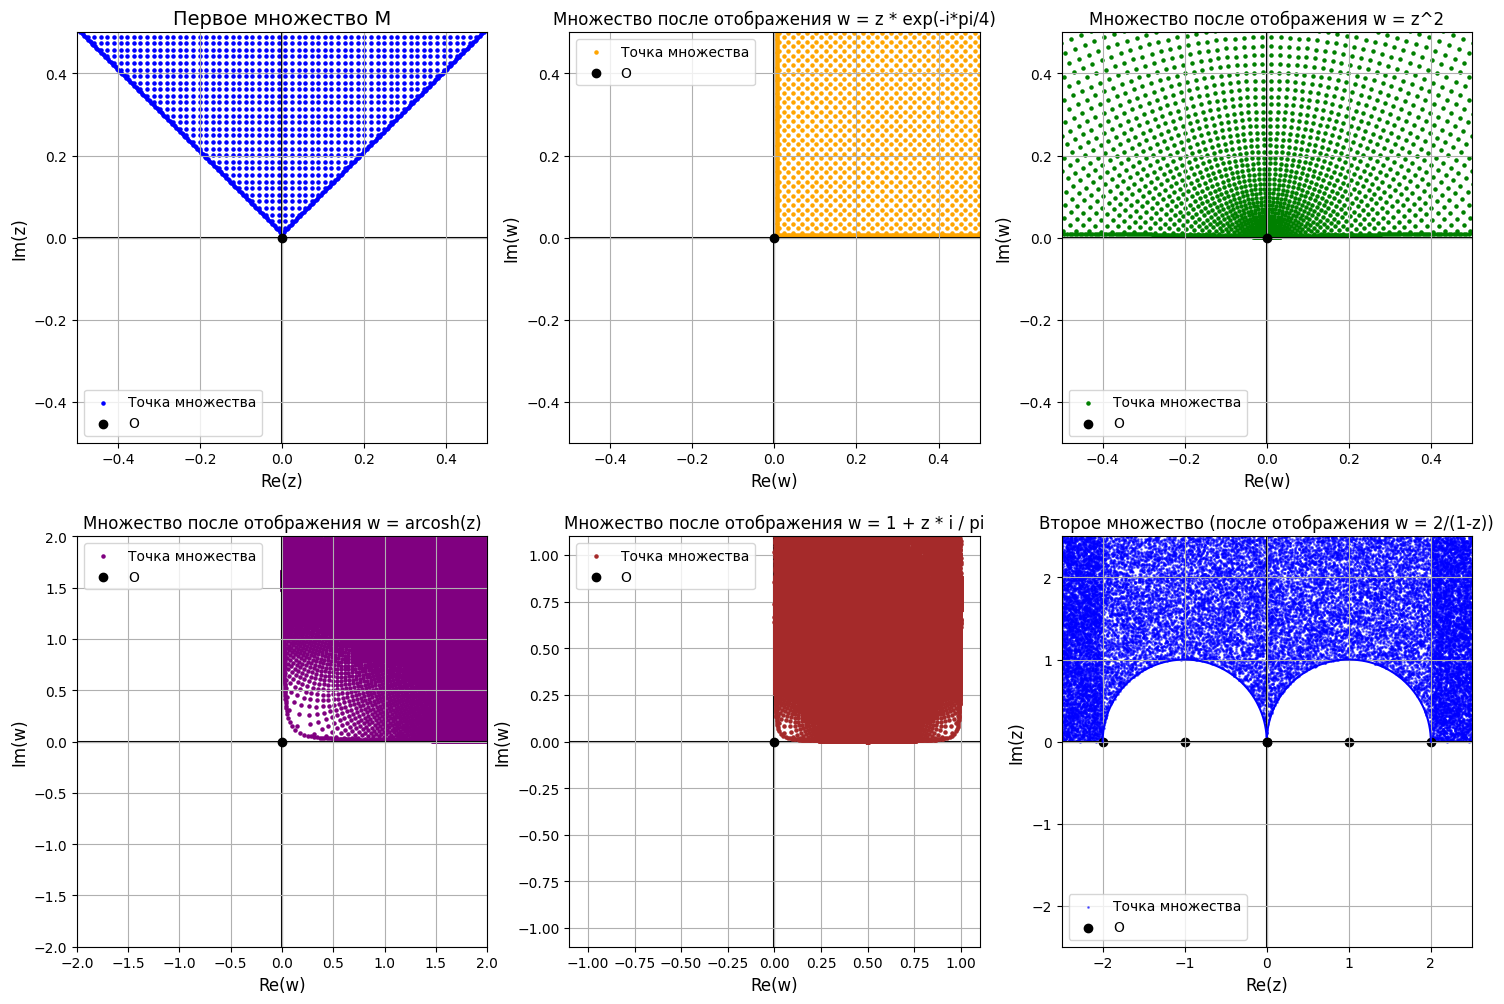

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# M={(x,y) | y > |x|}
def generate_points_m(bounds, num_points, dense_factor=5):
    x = np.linspace(-bounds, bounds, num_points)
    y = np.linspace(-bounds, bounds, num_points)
    points = []
    for xi in x:
        for yi in y:
            if yi > abs(xi):
                points.append(complex(xi, yi))

    x_dense = np.linspace(-bounds, bounds, num_points * dense_factor)
    for xi in x_dense:
        points.append(complex(xi, abs(xi) + 0.01))

    return np.array(points)


bounds = 2
num_points = 250

points_m = generate_points_m(bounds, num_points)

def mapping_w_exp(points):
    return points * np.exp(-1j * np.pi / 4)

def mapping_w_square(points):
    return points ** 2

def mapping_w_arccosh(points):
    return np.arccosh(points)

def mapping_w_custom(points):
    return 1 + points * 1j / np.pi

def mapping_w_two_circles(points):
    return 2/(1-points)

def generate_gray_area_points(num_points=10000):
    x1 = np.random.uniform(-2, 0, num_points)
    y1 = np.random.uniform(0, 2.5, num_points)
    mask1 = y1 > np.sqrt(1 - (x1 + 1)**2)

    x2 = np.random.uniform(0, 2, num_points)
    y2 = np.random.uniform(0, 2.5, num_points)
    mask2 = y2 > np.sqrt(1 - (x2 - 1)**2)

    x3 = np.random.uniform(-2.5, -2, num_points // 2)
    y3 = np.random.uniform(0, 2.5, num_points // 2)

    x4 = np.random.uniform(2, 2.5, num_points // 2)
    y4 = np.random.uniform(0, 2.5, num_points // 2)

    x = np.concatenate([x1[mask1], x2[mask2], x3, x4])
    y = np.concatenate([y1[mask1], y2[mask2], y3, y4])
    return x, y

# Отображения
mapped_points_exp = mapping_w_exp(points_m)
mapped_points_square = mapping_w_square(mapped_points_exp)
mapped_points_arccosh = mapping_w_arccosh(mapped_points_square)
mapped_points_custom = mapping_w_custom(mapped_points_arccosh)

# Vẽ đồ thị tập hợp M
plt.figure(figsize=(18, 12))

# Первое множество
plt.subplot(2, 3, 1)
plt.scatter(points_m.real, points_m.imag, s=5, c='blue', label='Точка множества')
plt.scatter([0], [0], color='black', label='O', zorder=5)
plt.axhline(0, color='black', linewidth=1.5, zorder=1)  #  Im z
plt.axvline(0, color='black', linewidth=1.5, zorder=1)  #  Re z
plt.title("Первое множество M", fontsize=14)
plt.xlabel("Re(z)", fontsize=12)
plt.ylabel("Im(z)", fontsize=12)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Множество после отображения w = z * exp(-i*pi/4)
plt.subplot(2, 3, 2)
plt.scatter(mapped_points_exp.real, mapped_points_exp.imag, s=5, c='orange', label='Точка множества')
plt.scatter([0], [0], color='black', label='O', zorder=5)
plt.axhline(0, color='black', linewidth=1.5, zorder=1)  #  Im w
plt.axvline(0, color='black', linewidth=1.5, zorder=1)  #  Re w
plt.title("Множество после отображения w = z * exp(-i*pi/4)", fontsize=12)
plt.xlabel("Re(w)", fontsize=12)
plt.ylabel("Im(w)", fontsize=12)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Множество после отображения w = z^2
plt.subplot(2, 3, 3)
plt.scatter(mapped_points_square.real, mapped_points_square.imag, s=5, c='green', label='Точка множества')
plt.scatter([0], [0], color='black', label='O', zorder=5)
plt.axhline(0, color='black', linewidth=1.5, zorder=1)  #  Im w
plt.axvline(0, color='black', linewidth=1.5, zorder=1)  #  Re w
plt.title("Множество после отображения w = z^2", fontsize=12)
plt.xlabel("Re(w)", fontsize=12)
plt.ylabel("Im(w)", fontsize=12)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Множество после отображения w = arcosh(z)
plt.subplot(2, 3, 4)
plt.scatter(mapped_points_arccosh.real, mapped_points_arccosh.imag, s=5, c='purple', label='Точка множества')
plt.scatter([0], [0], color='black', label='O', zorder=5)
plt.axhline(0, color='black', linewidth=1.5, zorder=1)  #  Im w
plt.axvline(0, color='black', linewidth=1.5, zorder=1)  #  Re w
plt.title("Множество после отображения w = arcosh(z)", fontsize=12)
plt.xlabel("Re(w)", fontsize=12)
plt.ylabel("Im(w)", fontsize=12)
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Множество после отображения w = 1 + z * i / pi
plt.subplot(2, 3, 5)
num_points = 30000
x_new = np.random.uniform(0, 1, num_points)
y_new = np.random.uniform(0.6, 2, num_points)
plt.scatter(x_new, y_new, s=5, c='brown', label='', zorder=2)
plt.scatter(mapped_points_custom.real, mapped_points_custom.imag, s=5, c='brown', label='Точка множества', zorder=2)
plt.scatter([0], [0], color='black', label='O', zorder=5)
plt.axhline(0, color='black', linewidth=1.5, zorder=1)  #  Im w
plt.axvline(0, color='black', linewidth=1.5, zorder=1)  #  Re w
plt.grid(True, zorder=3)
plt.title("Множество после отображения w = 1 + z * i / pi", fontsize=12)
plt.xlabel("Re(w)", fontsize=12)
plt.ylabel("Im(w)", fontsize=12)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')


# Множество после отображения w = 2/(1-z)
plt.subplot(2, 3, 6)
num_points = 12000
x_gray, y_gray = generate_gray_area_points(num_points=num_points)
plt.scatter(x_gray, y_gray, s=1, color='blue', alpha=0.5, label='Точка множества')
theta = np.linspace(0, np.pi, 500)
x_left = -1 + np.cos(theta)
y_left = np.sin(theta)
x_right = 1 + np.cos(theta)
y_right = np.sin(theta)
plt.plot(x_left, y_left, color='blue')
plt.plot(x_right, y_right, color='blue')
plt.axhline(0, color='black', linewidth=1.5, zorder=1)  #  Im w
plt.axvline(0, color='black', linewidth=1.5, zorder=1)  #  Re w
plt.scatter([-2, -1, 0, 1, 2], [0, 0, 0, 0, 0], color='black')
plt.scatter([0], [0], color='black', label='O', zorder=5)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Второе множество (после отображения w = 2/(1-z))", fontsize=12)
plt.xlabel("Re(z)", fontsize=12)
plt.ylabel("Im(z)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()




